In [205]:
!pip install matplotlib

In [206]:
!pip install seaborn

In [207]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('C:/Users/DELL/Desktop/veri bilimi kampı/train.csv')
data=df.copy()

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [208]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [209]:
def bar_plot(variable):
    var=df[variable]
    varValue=var.value_counts()
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue.index.values)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("frequency of {}".format(variable))
    plt.title(f"{variable}")
    plt.show()
    print("frequency of {}".format(variable))

In [210]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


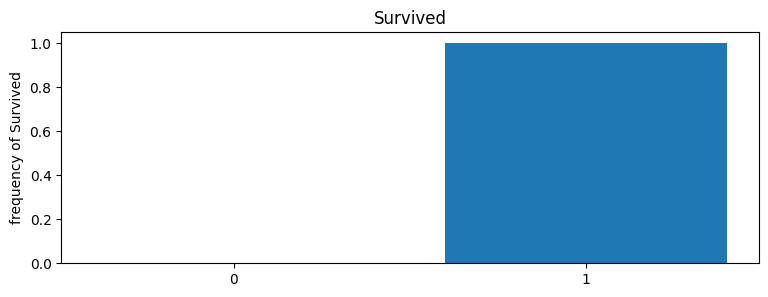

frequency of Survived


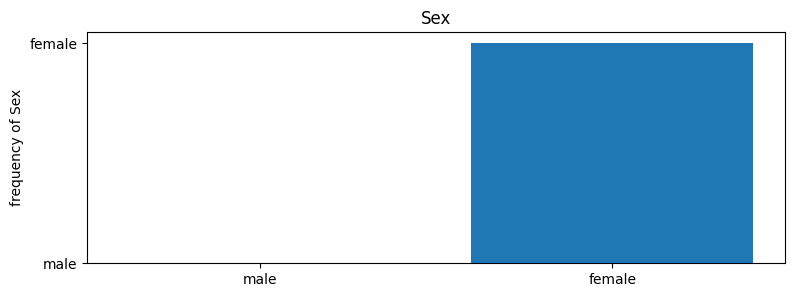

frequency of Sex


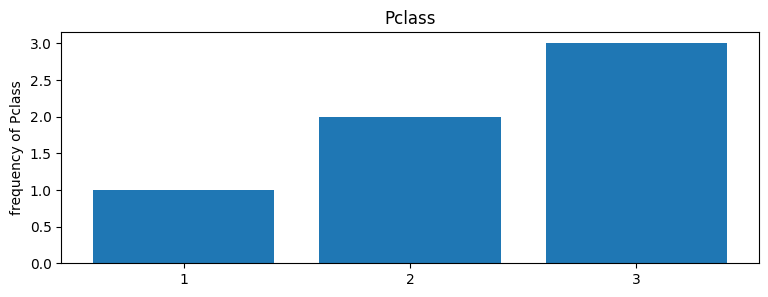

frequency of Pclass


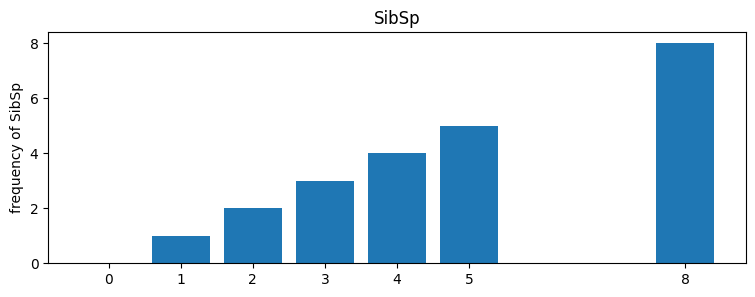

frequency of SibSp


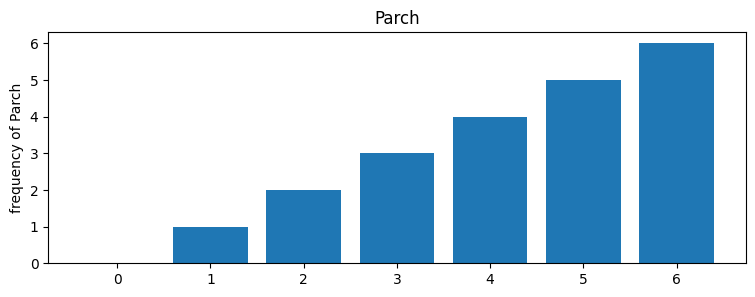

frequency of Parch


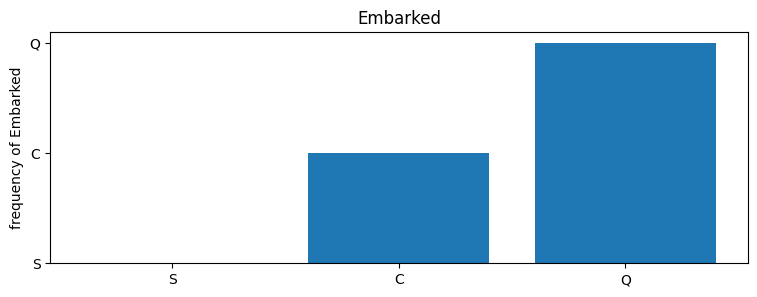

frequency of Embarked


In [212]:
import matplotlib.pyplot as plt
cat_columns=['Survived','Sex','Pclass','SibSp','Parch','Embarked']
for column in cat_columns:
    bar_plot(column)

In [213]:
def hist_plot(variable):
    plt.figure(figsize=(9,3))
    plt.hist(df[variable], bins=20)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(f"Frequency of {variable}")
    plt.show()

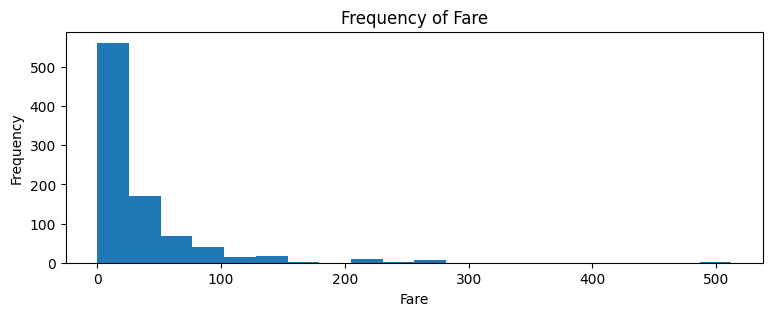

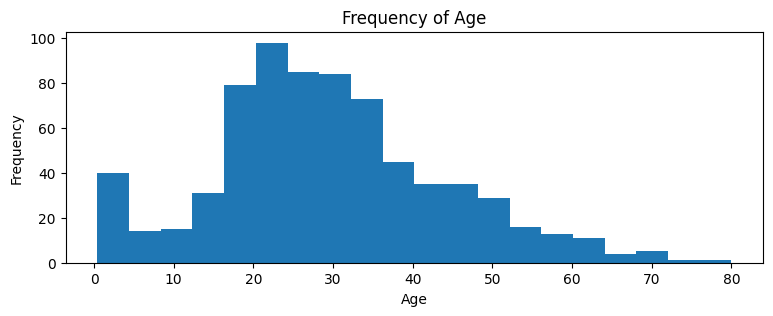

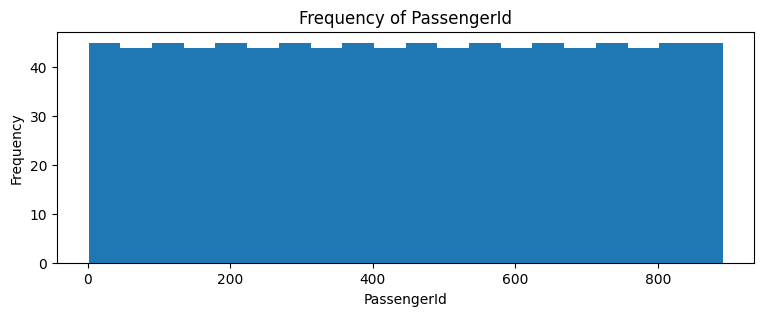

In [214]:
num_columns=["Fare","Age","PassengerId"]
for column in num_columns:
    hist_plot(column)

In [215]:
df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [216]:
df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [217]:
#AYKIRI DEĞER ANALİZİ (OUTLIER DETECTION)

In [218]:
df = data.copy()

In [219]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    for feature in features:
        q1 = df[feature].quantile(0.25)
        q3 = df[feature].quantile(0.75)
        iqr = q3 - q1
        outlier_step = iqr * 1.5
        
        outlier_list_col = df[(df[feature] < q1 - outlier_step) | (df[feature] > q3 + outlier_step)].index
        
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v > 2)
    return multiple_outliers

In [220]:
df.loc[detect_outliers(df,["Age","Fare","SibSp","Parch"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.00,B22,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S


In [221]:
df=df.drop(detect_outliers(df,["Age","Fare","SibSp","Parch"]),axis=0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [222]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [223]:
#FİND MİSSİNG VALUES

In [224]:
df.isnull().any()  #boş veri var mı??

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [225]:
df.isnull().sum() #eksik veri sayısını böyle elde ediyoruz normalde

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [226]:
df[df['Embarked'].isnull()]  #ilgili değeri null olan satırları getirir

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


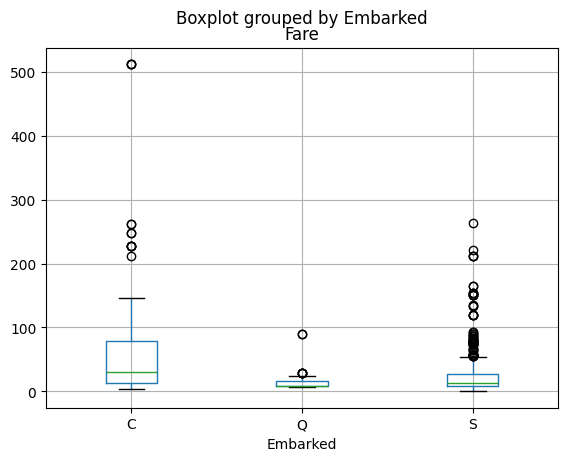

In [227]:
df.boxplot(column="Fare", by="Embarked")
plt.show()

In [228]:
df['Embarked']=df['Embarked'].fillna('C') #boş olan yerleri C ile doldur

In [229]:
df[df['Embarked'].isnull()] #artık null değil o yüzden çıktısı yok

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [230]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [231]:
mean_Age=df['Age'].mean()

In [232]:
df['Age'] =df['Age'].fillna(mean_Age)

In [233]:
df[df['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.674887,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.674887,1,2,W./C. 6607,23.4500,NaN,S


In [234]:
df['Cabin'].value_counts()

Cabin
B96 B98    4
G6         4
F2         3
D          3
E101       3
          ..
C32        1
E34        1
C7         1
C54        1
C148       1
Name: count, Length: 147, dtype: int64

In [235]:
df.drop(['Cabin','PassengerId'], axis=1, inplace=True)

In [236]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [237]:
##Visualization

In [238]:
#Correlation Between sibsp -- Parch -- 

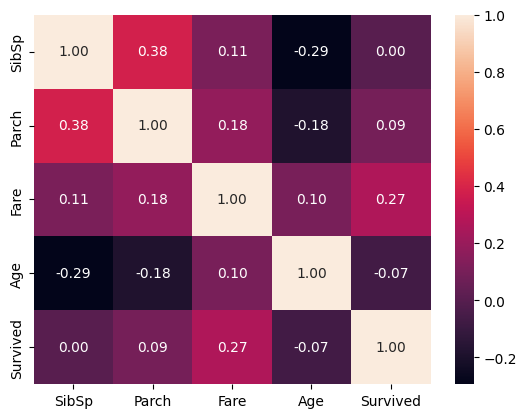

In [239]:
list1=['SibSp','Parch','Fare','Age','Survived']
import seaborn as sns
sns.heatmap(df[list1].corr(),annot=True,fmt='.2f')
plt.show()  

In [240]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [241]:
? pd.get_dummies  # kodun açıklaması ve örneklerini çıkarıyor ? yazarsan başına

Object ` pd.get_dummies  # kodun açıklaması ve örneklerini çıkarıyor ? yazarsan başına` not found.


In [242]:
pd.get_dummies(df['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [243]:
pd.get_dummies(df['Embarked'],dtype='int')

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [244]:
!pip install scikit-learn

In [245]:
from sklearn.preprocessing import LabelEncoder

In [246]:
le=LabelEncoder()
df['LE_Embarked']=le.fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LE_Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,2


In [247]:
df.drop(['Embarked'],axis=1,inplace=True)

In [248]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,LE_Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2


In [249]:
df['Sex'], labels = pd.factorize(df['Sex'])
labels

Index(['male', 'female'], dtype='object')

In [250]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,LE_Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,2
4,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,2
887,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.674887,1,2,W./C. 6607,23.4500,2
889,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,0


In [251]:
df.drop(['Name','Ticket'],axis=1, inplace=True)

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 880 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     880 non-null    int64  
 1   Pclass       880 non-null    int64  
 2   Sex          880 non-null    int64  
 3   Age          880 non-null    float64
 4   SibSp        880 non-null    int64  
 5   Parch        880 non-null    int64  
 6   Fare         880 non-null    float64
 7   LE_Embarked  880 non-null    int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 58.4 KB


In [256]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(df['Age'].values.reshape(-1,1))

array([[-0.59053435],
       [ 0.6405651 ],
       [-0.28275948],
       [ 0.40973395],
       [ 0.40973395],
       [ 0.        ],
       [ 1.87166455],
       [-2.12940866],
       [-0.20581577],
       [-1.20608407],
       [-1.97552122],
       [ 2.17943941],
       [-0.74442178],
       [ 0.71750882],
       [-1.20608407],
       [ 1.94860826],
       [-2.12940866],
       [ 0.        ],
       [ 0.10195909],
       [ 0.        ],
       [ 0.40973395],
       [ 0.33279024],
       [-1.12914035],
       [-0.12887205],
       [-1.66774636],
       [ 0.6405651 ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.79445253],
       [ 0.        ],
       [ 0.        ],
       [ 2.79498913],
       [-0.12887205],
       [ 0.94833996],
       [ 0.        ],
       [-0.66747806],
       [-0.89830921],
       [-1.20608407],
       [ 0.79445253],
       [-0.20581577],
       [ 0.        ],
       [-2.05246494],
       [-0.82136549],
       [ 0.        ],
       [ 0

In [257]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,LE_Embarked
0,0,3,0,22.000000,1,0,7.2500,2
1,1,1,1,38.000000,1,0,71.2833,0
2,1,3,1,26.000000,0,0,7.9250,2
3,1,1,1,35.000000,1,0,53.1000,2
4,0,3,0,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,2
887,1,1,1,19.000000,0,0,30.0000,2
888,0,3,1,29.674887,1,2,23.4500,2
889,1,1,0,26.000000,0,0,30.0000,0


In [259]:
df['Fare']=scaler.fit_transform(df['Age'].values.reshape(-1,1))
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,LE_Embarked
0,0,3,0,22.000000,1,0,-0.590534,2
1,1,1,1,38.000000,1,0,0.640565,0
2,1,3,1,26.000000,0,0,-0.282759,2
3,1,1,1,35.000000,1,0,0.409734,2
4,0,3,0,35.000000,0,0,0.409734,2
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,-0.205816,2
887,1,1,1,19.000000,0,0,-0.821365,2
888,0,3,1,29.674887,1,2,0.000000,2
889,1,1,0,26.000000,0,0,-0.282759,0


In [260]:
df.rename(columns={'Fare':'Fare'},inplace=True)

In [261]:
df.rename(columns={'LE_Embarked':'Embarked'},inplace=True)

In [262]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,-0.590534,2
1,1,1,1,38.000000,1,0,0.640565,0
2,1,3,1,26.000000,0,0,-0.282759,2
3,1,1,1,35.000000,1,0,0.409734,2
4,0,3,0,35.000000,0,0,0.409734,2
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,-0.205816,2
887,1,1,1,19.000000,0,0,-0.821365,2
888,0,3,1,29.674887,1,2,0.000000,2
889,1,1,0,26.000000,0,0,-0.282759,0


In [263]:
df.to_csv("C:/Users/DELL/Desktop/veri bilimi kampı/temizlenmiş_train.csv",index=False)

In [264]:
!pip install klib

In [265]:
import klib

In [266]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [267]:
klib.data_cleaning(data)

Shape of cleaned data: (891, 12) - Remaining NAs: 866


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.05 MB (-62.5%)



,passenger_id,survived,pclass,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250000,<NA>,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283302,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925000,<NA>,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.099998,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050000,<NA>,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000000,<NA>,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450001,<NA>,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000000,C148,C


GridSpec(6, 5)

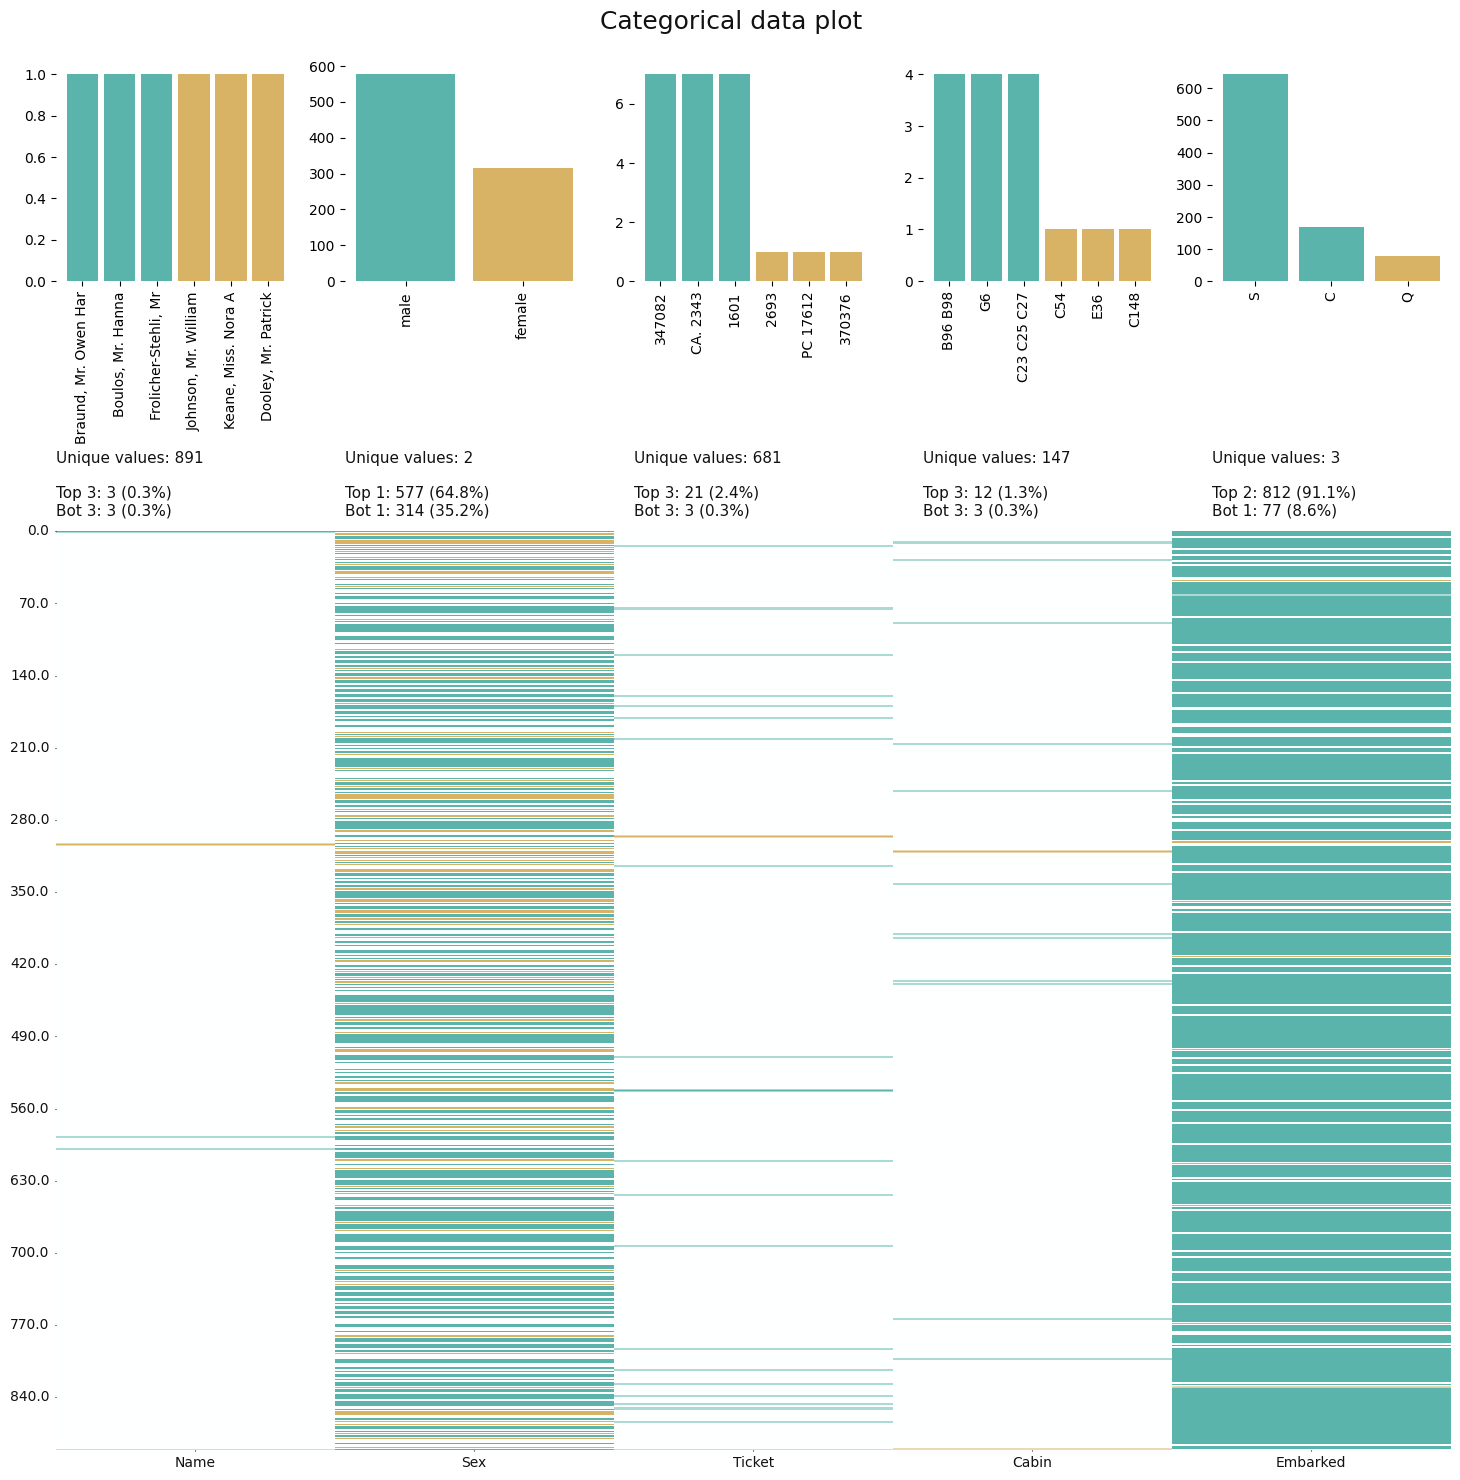

In [269]:
klib.cat_plot(data)

<Axes: title={'center': 'Feature-correlation (pearson)'}>

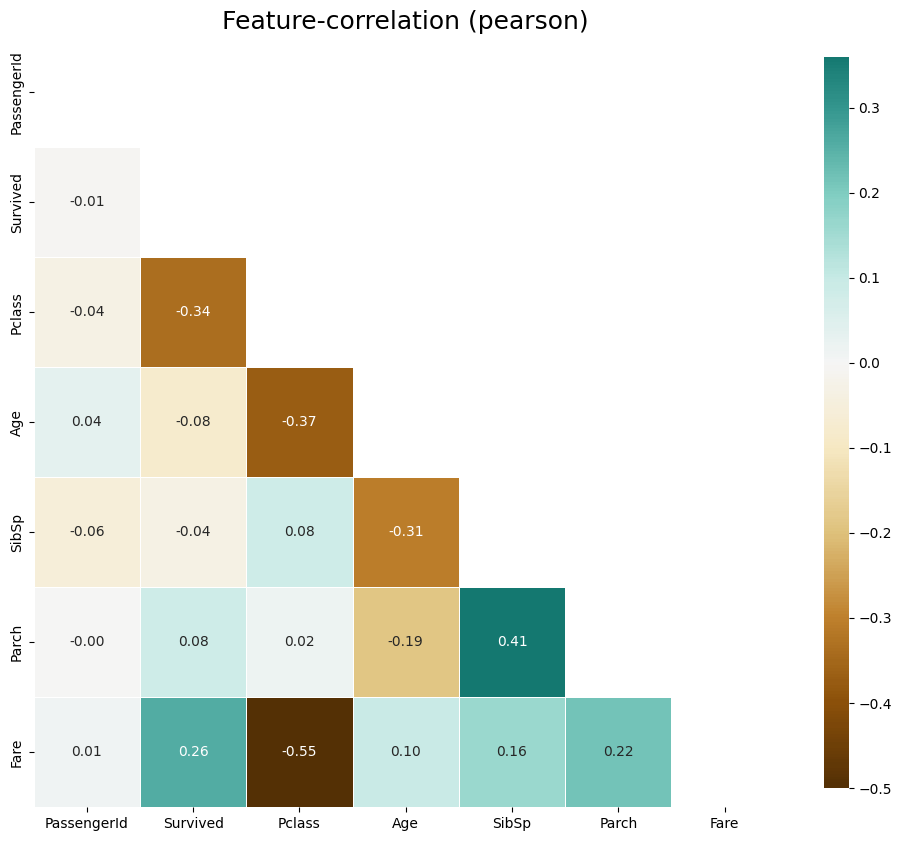

In [270]:
klib.corr_plot(data)

GridSpec(6, 6)

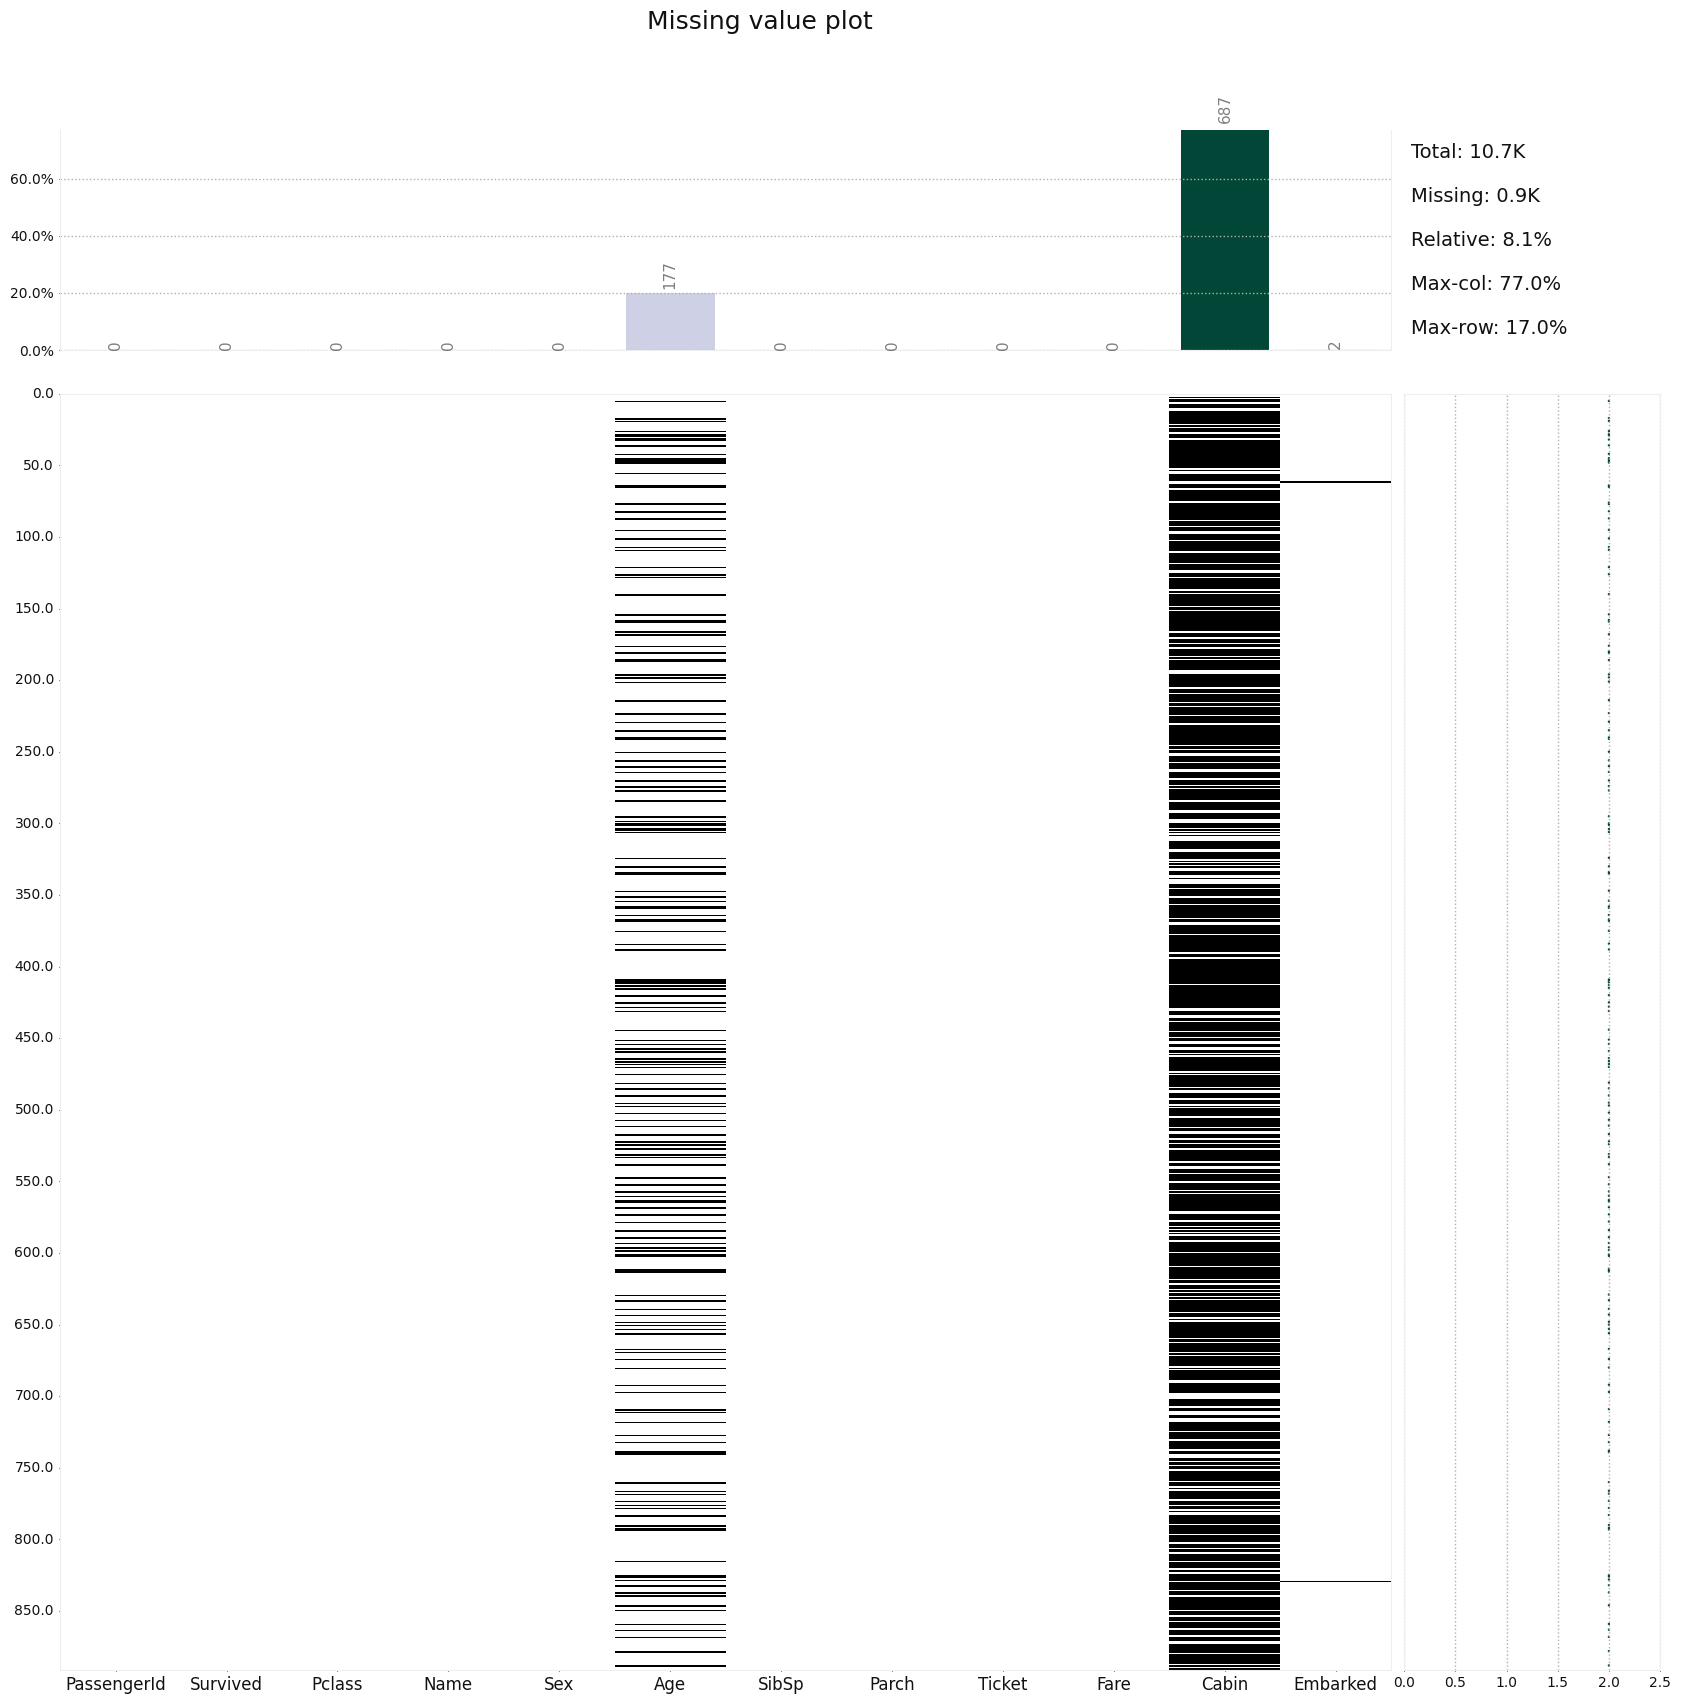

In [272]:
klib.missingval_plot(data)

In [273]:
klib.drop_missing(data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: >

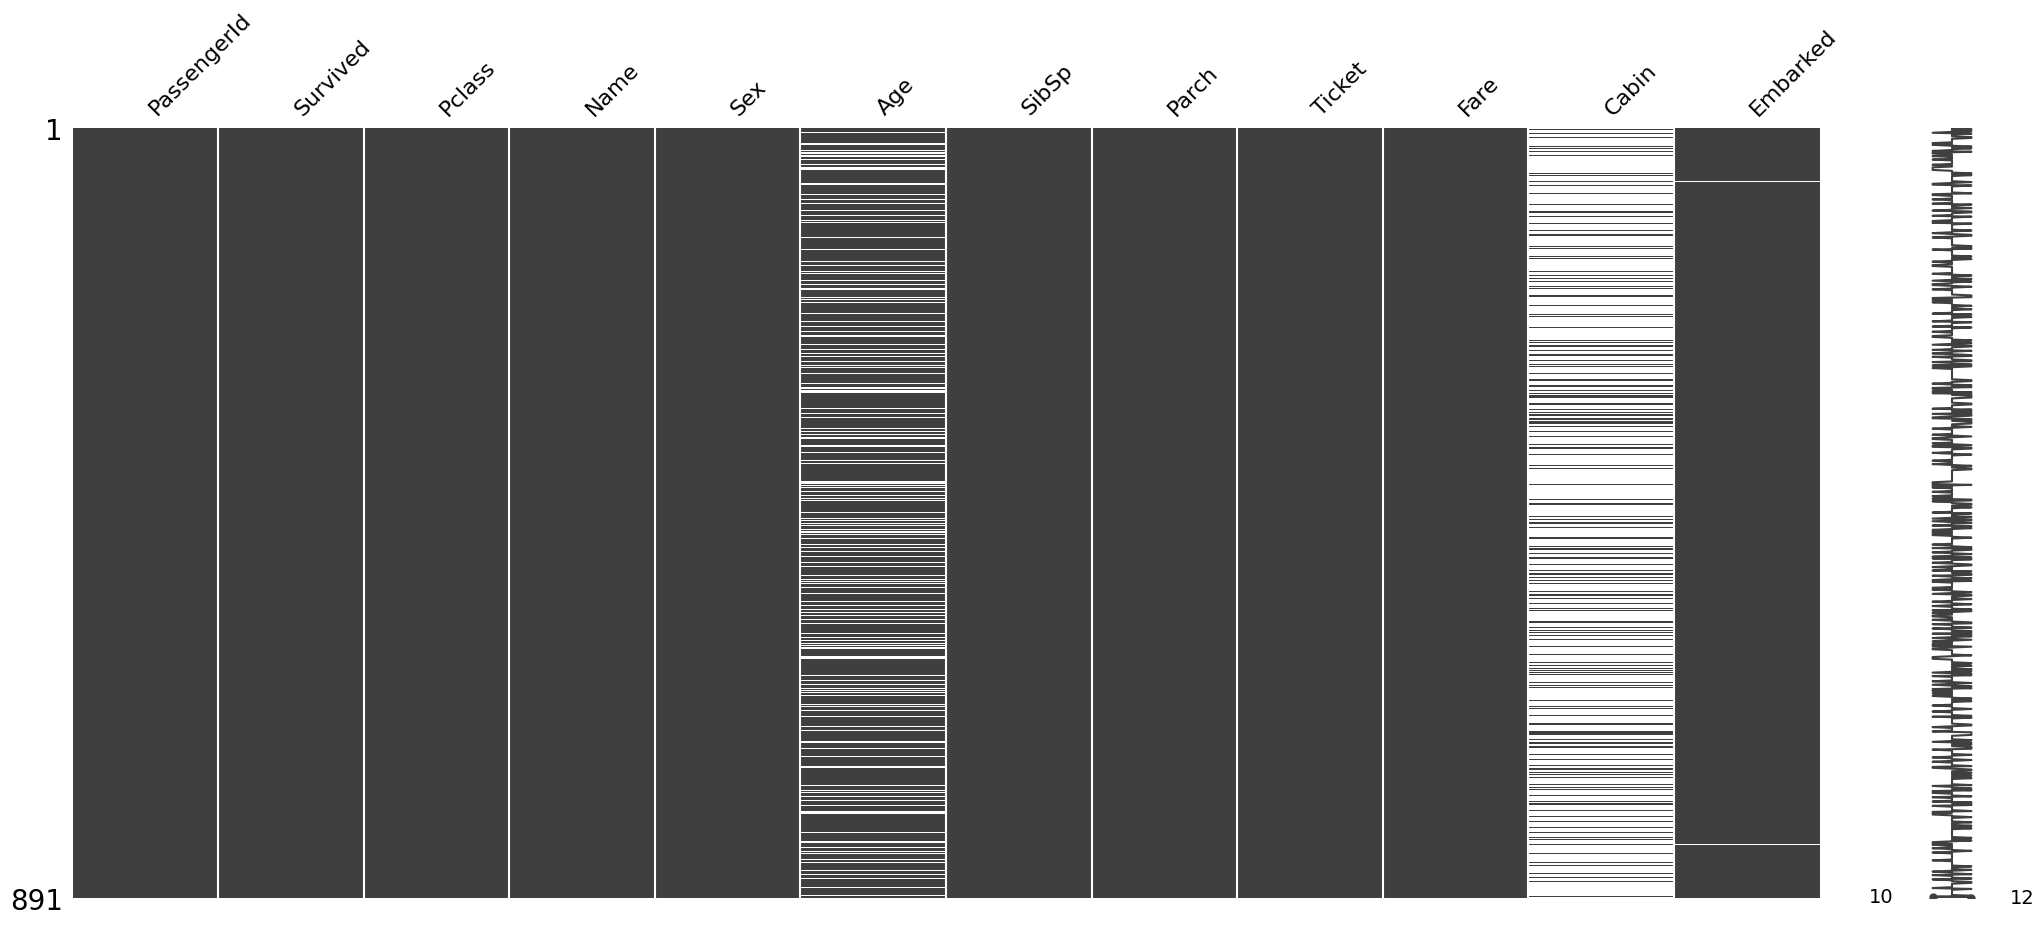

In [277]:
!pip install missingno
import missingno as msno
msno.matrix(data)